In [9]:
%matplotlib inline
from deepdecoder.evaluate_mask_losses import evaluate_loss, compile_loss_fn
from deepdecoder.mask_loss import mask_loss_mse, mask_loss_sobel, mask_loss_adaptive_mse, pyramid_loss
from deepdecoder.utils import visualise_tiles, zip_visualise_tiles
from beesgrid import gt_grids, draw_grids, BlackWhiteArtist, CONFIG_LABELS, TAG_SIZE
import numpy as np
import matplotlib.pyplot as plt
import pylab
import time
pylab.rcParams['figure.figsize'] = (15, 15)

In [2]:
deeplocalizer_data = "/mnt/storage/leon/deeplocalizer_data"
with open(deeplocalizer_data + "/gt_hist_eq/tdat.txt") as f:
    gt_hist_eq = [l.rstrip('\n') for l in f.readlines()]
with open(deeplocalizer_data + "/gt_threshold/tdat.txt") as f:
    gt_hist_eq_thres = [l.rstrip('\n') for l in f.readlines()]
with open(deeplocalizer_data + "/gt_binary/tdat.txt") as f:
    gt_binary = [l.rstrip('\n') for l in f.readlines()]

In [3]:
start = time.time()
pyramid_loss_fn, loss_dict = compile_loss_fn(pyramid_loss)
print("Compile in {:.2f}s".format(time.time() - start))

Compile in 46.66s


In [12]:
def check_for_strange_inputs(gt_files, pyramid_loss_fn, batch_size=64):
    batch_shape = (batch_size, 1, TAG_SIZE, TAG_SIZE)
    batch = np.zeros(batch_shape, dtype=np.float32)
    for gt, ids, configs in gt_grids(gt_files, batch_size): 
        masks, = draw_grids(ids, configs, artist=MaskGridArtist())    
        outs = pyramid_loss_fn(batch)
        assert np.count_nonzero(np.isnan(outs[0])) == 0

In [13]:
check_for_strange_inputs(pyramid_loss_fn)

TypeError: Missing required input: <TensorType(float32, 4D)>

0.0985970987075
0.108840426945
0.119360535276
0.132304672598
0.143160840696
0.154177114722
0.167060268765
0.179124104376
0.19184823034
0.20441491803
0.219712470694
0.231622591181
0.244159274149


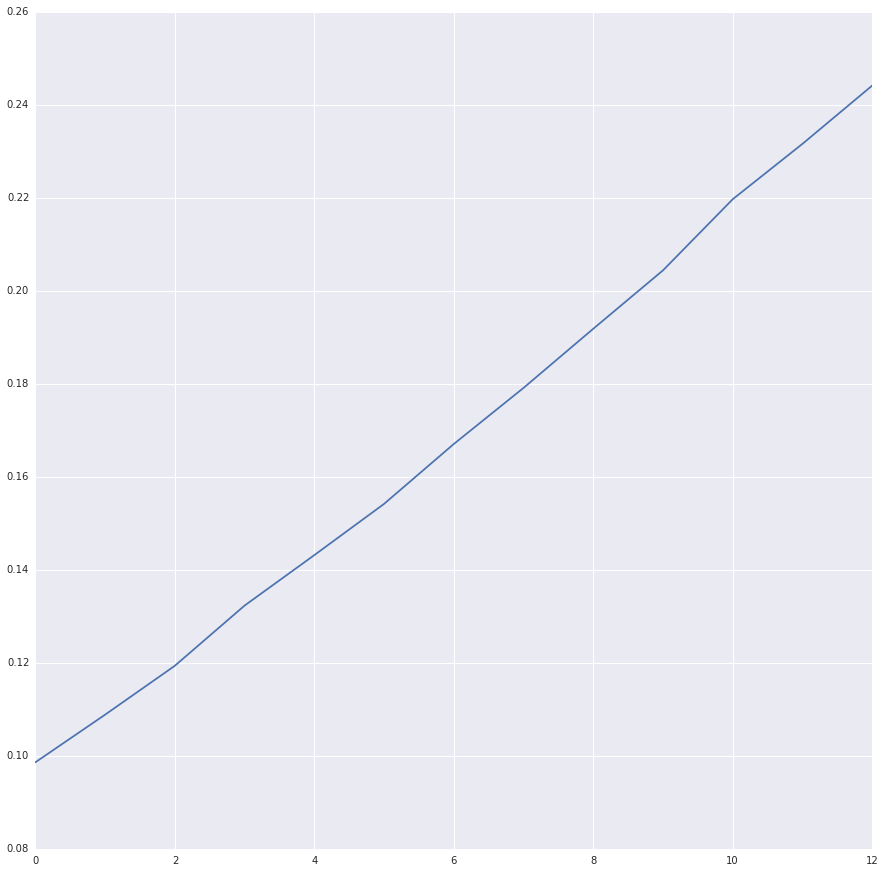

In [4]:
losses = []
for i in range(13):
    loss = evaluate_loss(gt_hist_eq, "pyramid_loss", pyramid_loss_fn, loss_dict, visualise=False, bit_flips=i)
    print(loss)
    losses.append(loss)
plt.plot(np.arange(13), losses)
plt.show()

0.0985970987075
0.0985970987075
0.0985970987075
0.0985970987075
0.0985970987075
0.100781120532
0.101514531161
0.102850555249
0.102204936328
0.106644935548
0.109254755305
0.110323552713
0.111178413084
0.11901698758
0.121918313736
0.123771284845
0.124170317185
0.132447338102
0.137501999926
0.13930233739


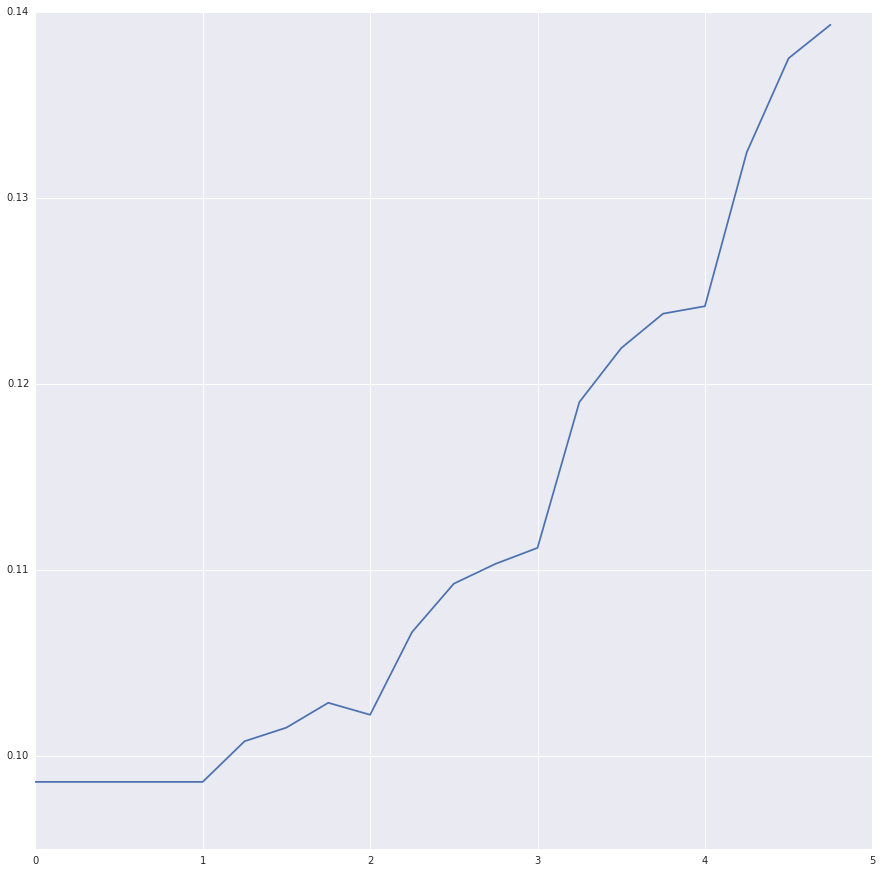

In [5]:
losses = []
translations = np.arange(0, 5, 0.25)
for i in translations:
    loss = evaluate_loss(gt_hist_eq, "pyramid_loss", pyramid_loss_fn, loss_dict, visualise=False, translation=i)
    print(loss)
    losses.append(loss)
plt.plot(translations, losses)
plt.show()

0.259697209348
0.259682282741
0.259403929437
0.258925119087
0.257971780368
0.256814631746
0.25555336612
0.253844594719
0.252292158893
0.250589316464
0.248126949884
0.245670825653
0.242630729046
0.239372631489
0.236262012568
0.232654766431
0.229193713868
0.225415700508
0.221580423001
0.218060894453
0.21458485309
0.210834152818
0.206989905214
0.202871067376
0.198737078936
0.194267356235
0.189437332415
0.184085561555
0.177423029126
0.169475983864
0.159198510746
0.147169122791
0.134132298086
0.121327900298
0.110496848308
0.102546957469
0.0985970987075
0.0998711812185
0.106032877336
0.115684691224
0.127930826287
0.141454872644
0.154522863382
0.166186459611
0.175397854994
0.182854807678
0.188813138823
0.193717092882
0.198381240482
0.202352079684
0.206192548178
0.210196192466
0.213966002189
0.217482209554
0.22107245258
0.224560897047
0.227955273778
0.231687350936
0.234916792747
0.237983645295
0.240863157255
0.243764274997
0.246409732239
0.248785732314
0.250587176598
0.252473380806
0.254296368

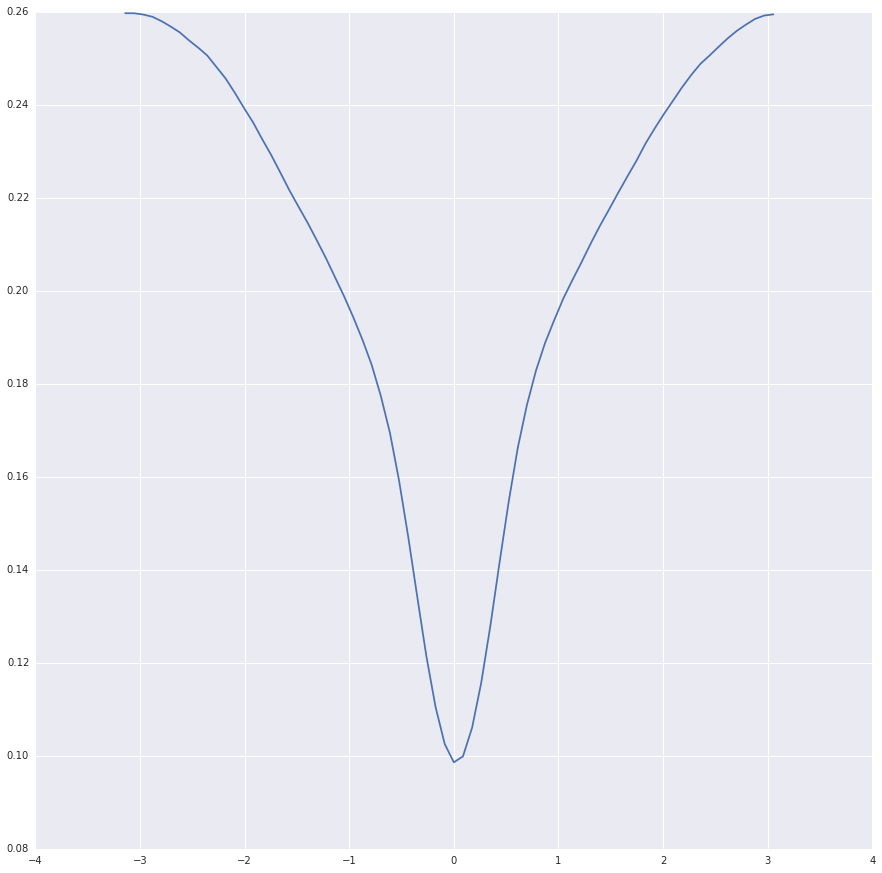

In [6]:
losses = []
rotations = np.arange(-np.pi, np.pi, np.pi/36)
for i in rotations:
    loss = evaluate_loss(gt_hist_eq, "pyramid_loss", pyramid_loss_fn, loss_dict, visualise=False, z_rotation=i)
    print(loss)
    losses.append(loss)
plt.plot(rotations, losses)
plt.show()

0
0 black_mean: [[[ 0.37053645]]]
1 mean_half_dist: [[[ 0.12618631]]]
2 white_mean: [[[ 0.62290907]]]
3 loss_black: 0.051412214234910346
4 loss_white: 0.04115364651690717
5 loss: 0.09256586075181752


/home/leon/anaconda3/envs/np110/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


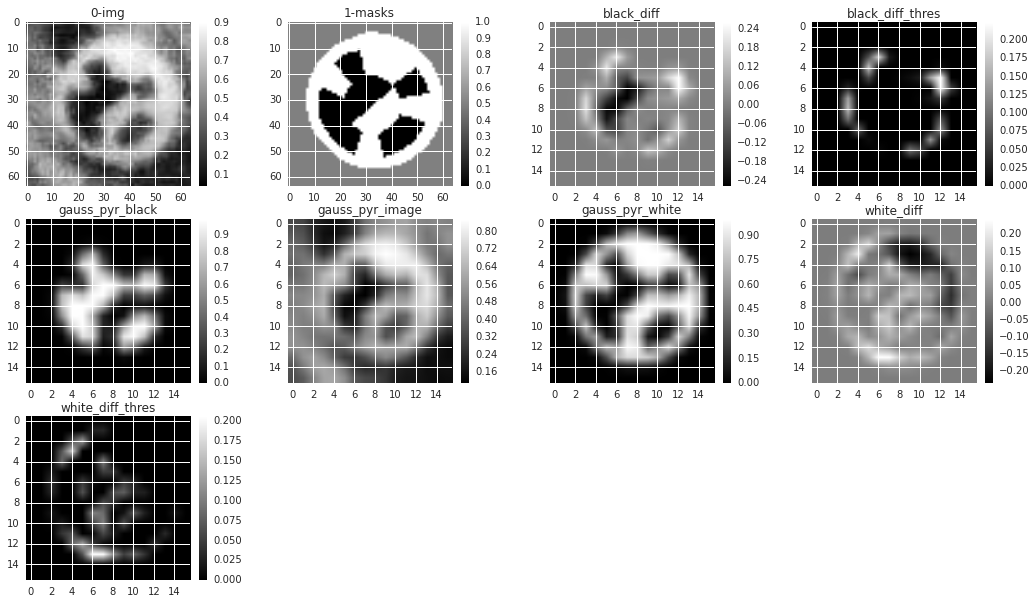

1
0 black_mean: [[[ 0.3788276]]]
1 mean_half_dist: [[[ 0.12413187]]]
2 white_mean: [[[ 0.62709135]]]
3 loss_black: 0.028309319913012283
4 loss_white: 0.03517676738340172
5 loss: 0.063486087296414


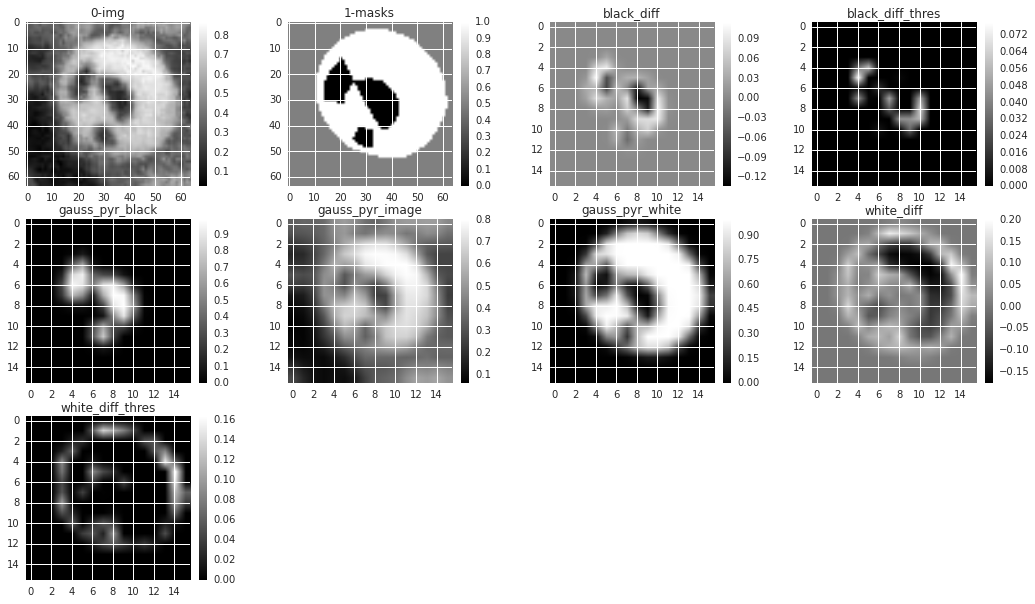

2
0 black_mean: [[[ 0.39593521]]]
1 mean_half_dist: [[[ 0.10000001]]]
2 white_mean: [[[ 0.59593523]]]
3 loss_black: 0.052144063371258174
4 loss_white: 0.06276758561475947
5 loss: 0.11491164898601763


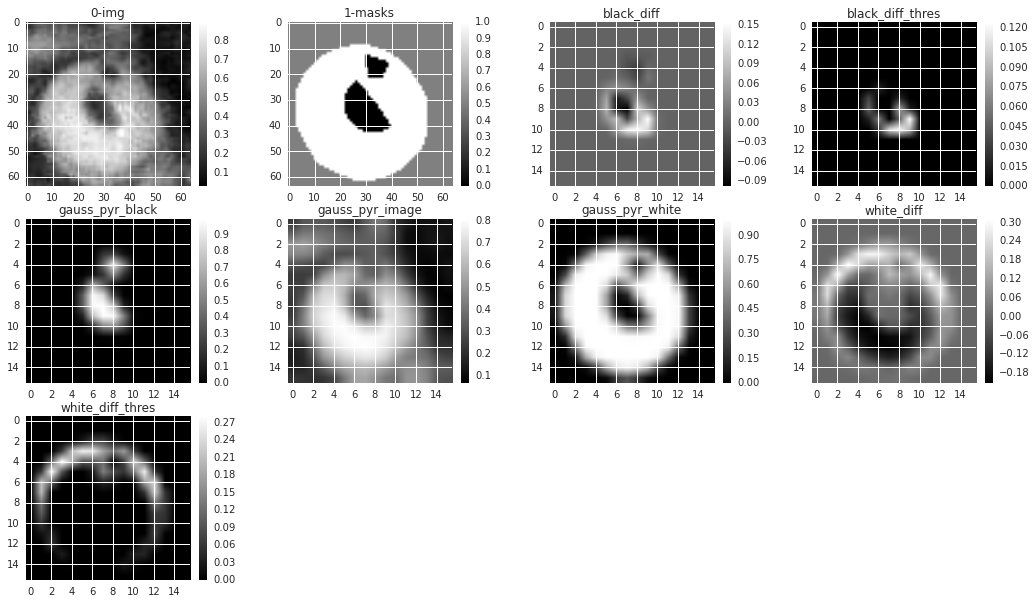

3
0 black_mean: [[[ 0.340839]]]
1 mean_half_dist: [[[ 0.10000001]]]
2 white_mean: [[[ 0.54083902]]]
3 loss_black: 0.044202719345870646
4 loss_white: 0.04643966300058052
5 loss: 0.09064238234645117


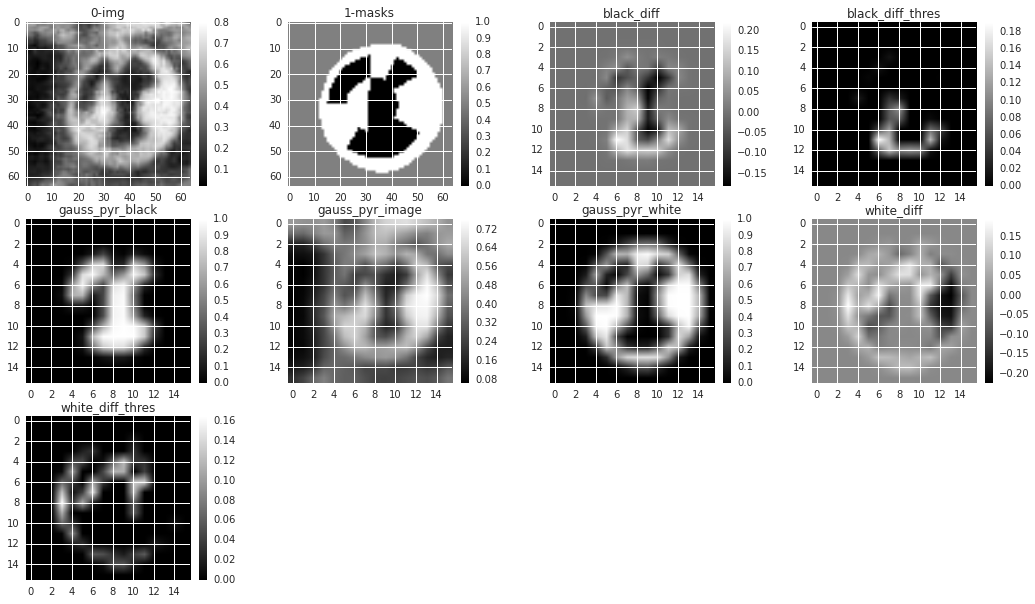

4
0 black_mean: [[[ 0.28238061]]]
1 mean_half_dist: [[[ 0.09999999]]]
2 white_mean: [[[ 0.4823806]]]
3 loss_black: 0.04822001796405074
4 loss_white: 0.06771339310053581
5 loss: 0.11593341106458654


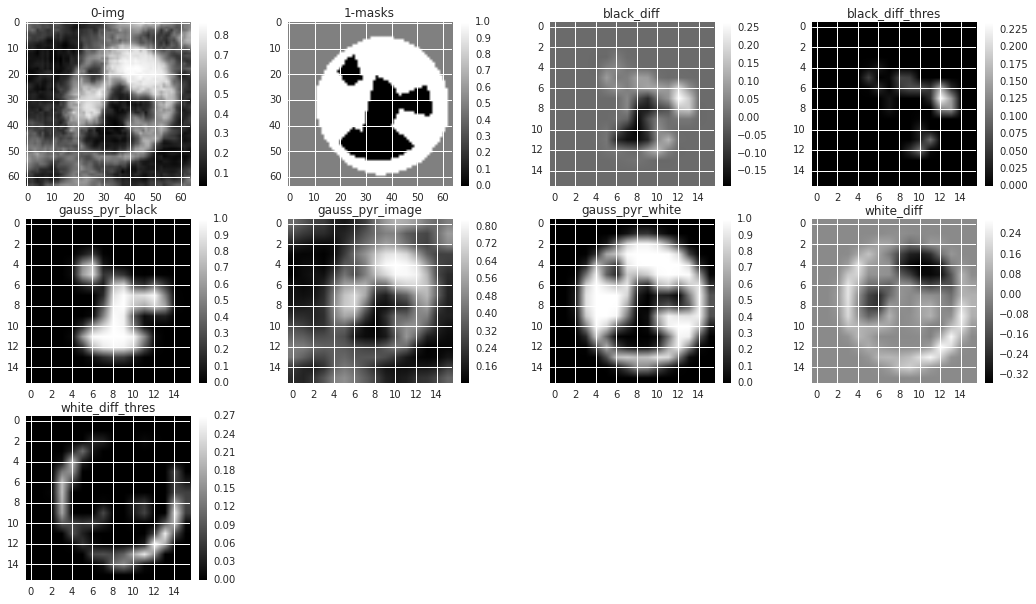

5
0 black_mean: [[[ 0.27174133]]]
1 mean_half_dist: [[[ 0.12751743]]]
2 white_mean: [[[ 0.52677619]]]
3 loss_black: 0.03364512813600115
4 loss_white: 0.036696640189616464
5 loss: 0.07034176832561762


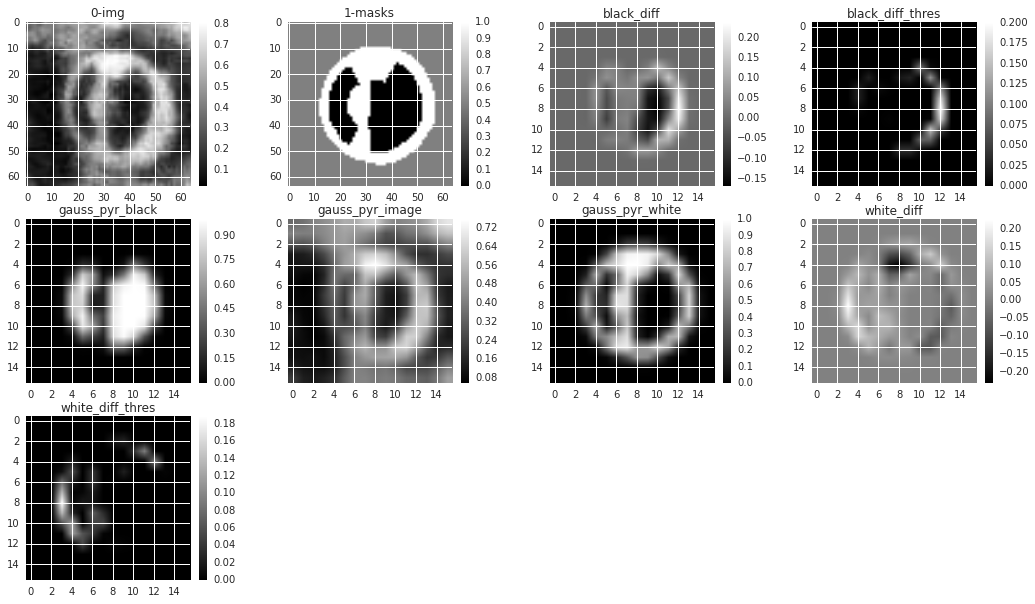

0.098597098707476183

In [6]:
evaluate_loss(gt_hist_eq, "pyramid_loss", pyramid_loss_fn, loss_dict, visualise=6)

0
0 black_mean: [[[ 0.39486355]]]
1 mean_half_dist: [[[ 0.11386588]]]
2 white_mean: [[[ 0.62259531]]]
3 loss_black: 0.0582777940282016
4 loss_white: 0.04440346575454132
5 loss: 0.10268125978274292


/home/leon/anaconda3/envs/np110/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


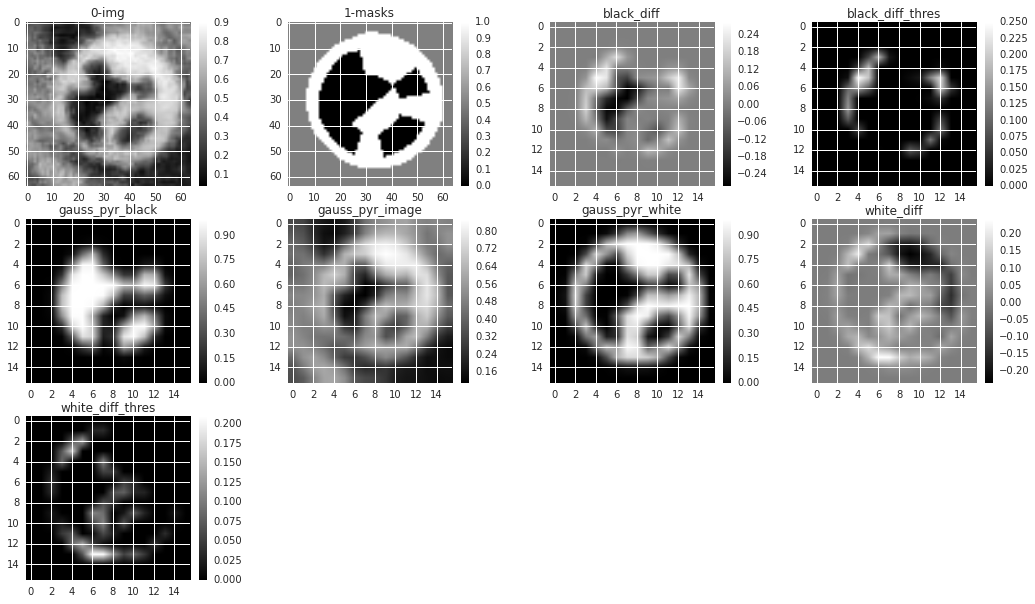

1
0 black_mean: [[[ 0.44267467]]]
1 mean_half_dist: [[[ 0.10000001]]]
2 white_mean: [[[ 0.64267468]]]
3 loss_black: 0.06707281653713161
4 loss_white: 0.04977648342149234
5 loss: 0.11684929995862395


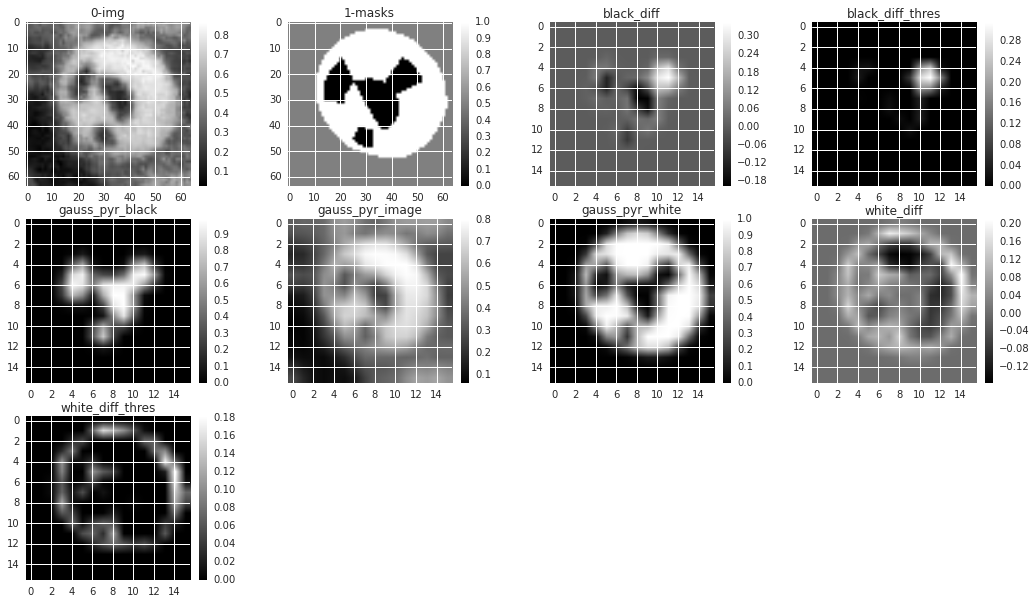

2
0 black_mean: [[[ 0.40286669]]]
1 mean_half_dist: [[[ 0.10000001]]]
2 white_mean: [[[ 0.60286671]]]
3 loss_black: 0.049172495156069064
4 loss_white: 0.06384195051995442
5 loss: 0.11301444567602348


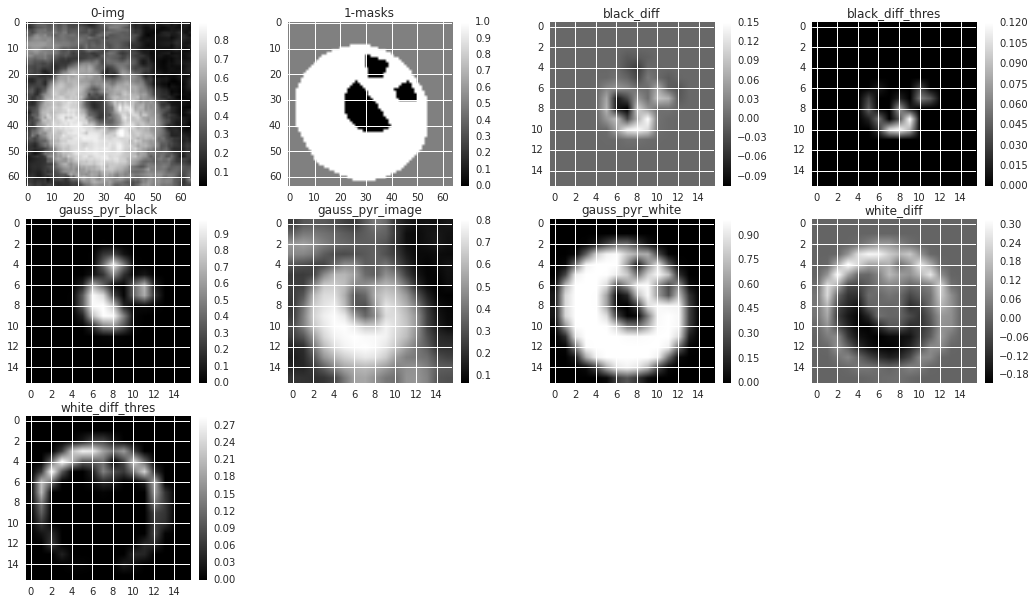

3
0 black_mean: [[[ 0.33632299]]]
1 mean_half_dist: [[[ 0.10000001]]]
2 white_mean: [[[ 0.53632301]]]
3 loss_black: 0.04877318545257671
4 loss_white: 0.050116586552767885
5 loss: 0.0988897720053446


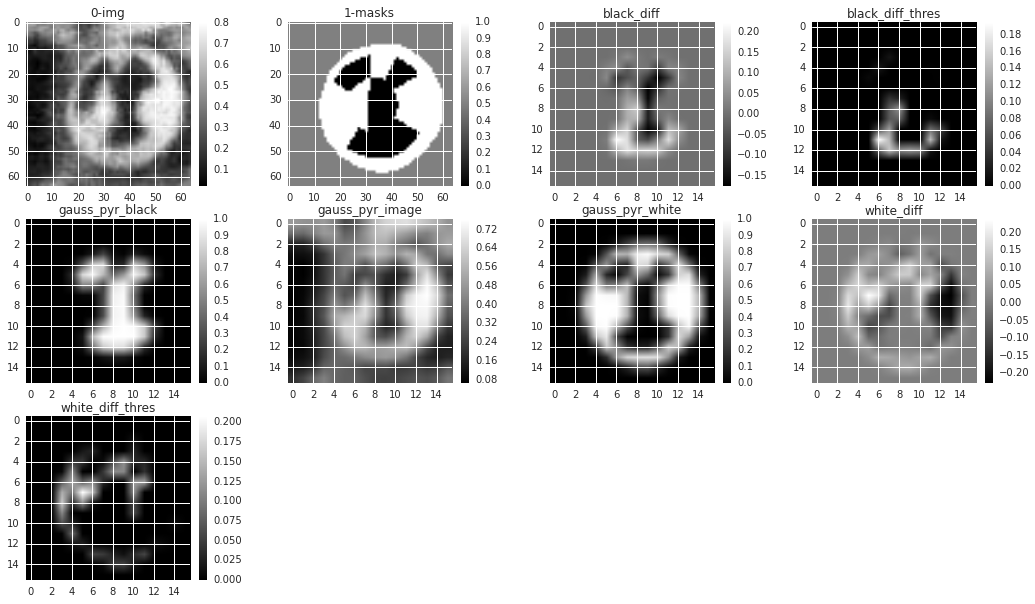

4
0 black_mean: [[[ 0.28123704]]]
1 mean_half_dist: [[[ 0.09999999]]]
2 white_mean: [[[ 0.48123702]]]
3 loss_black: 0.05476813678200568
4 loss_white: 0.07418109107307228
5 loss: 0.12894922785507795


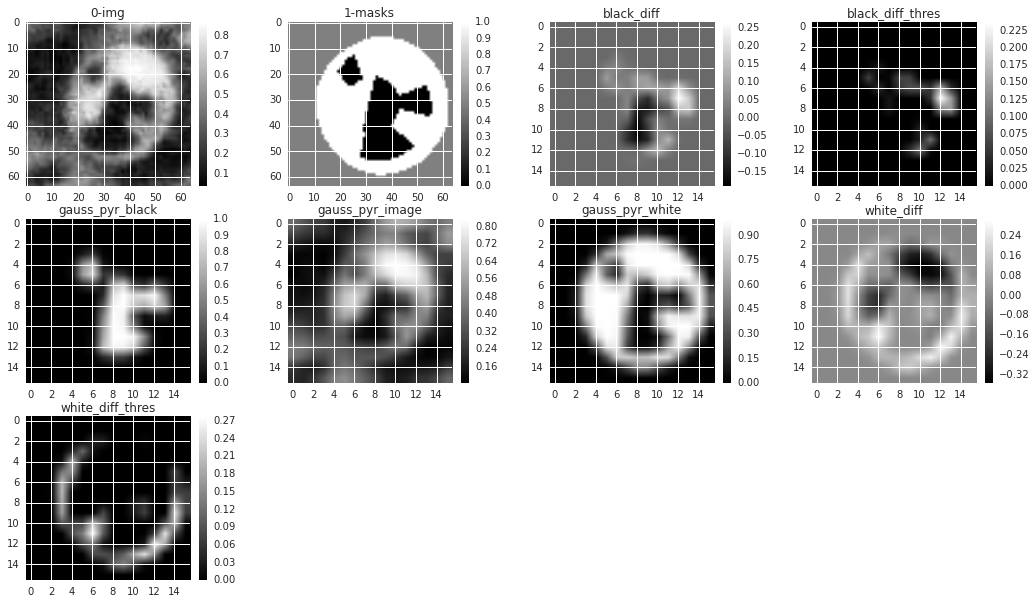

5
0 black_mean: [[[ 0.27098042]]]
1 mean_half_dist: [[[ 0.12187567]]]
2 white_mean: [[[ 0.51473176]]]
3 loss_black: 0.03570839087525303
4 loss_white: 0.04204701431544079
5 loss: 0.07775540519069382


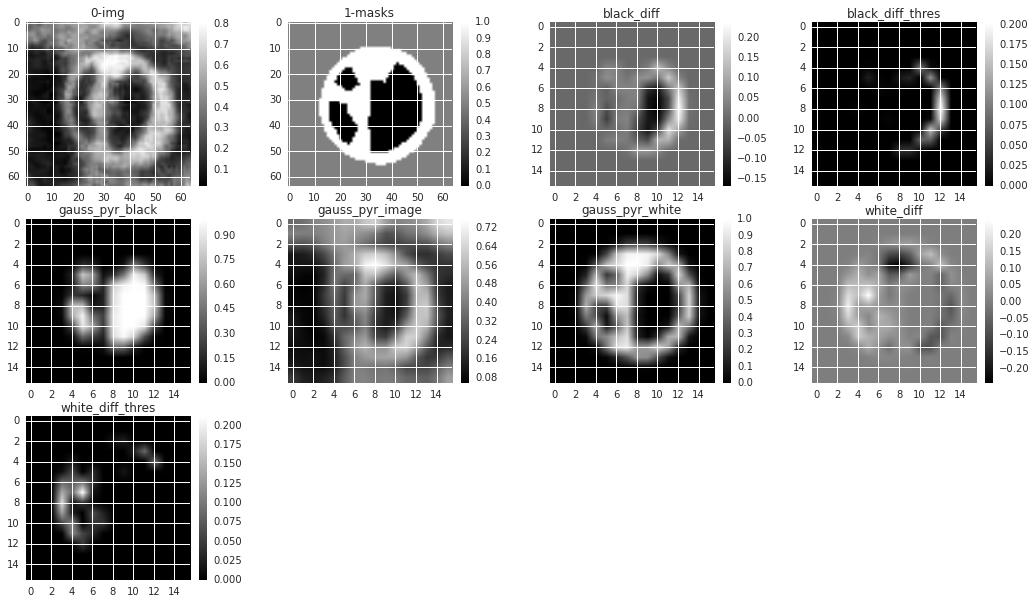

0.10896454271693867

In [7]:
evaluate_loss(gt_hist_eq, "pyramid_loss", pyramid_loss_fn, loss_dict, bit_flips=1, visualise=6)

0
0 black_mean: [[[ 0.42882457]]]
1 mean_half_dist: [[[ 0.10000001]]]
2 white_mean: [[[ 0.62882459]]]
3 loss_black: 0.11772835863659442
4 loss_white: 0.09414626946602103
5 loss: 0.21187462810261545


/home/leon/anaconda3/envs/np110/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


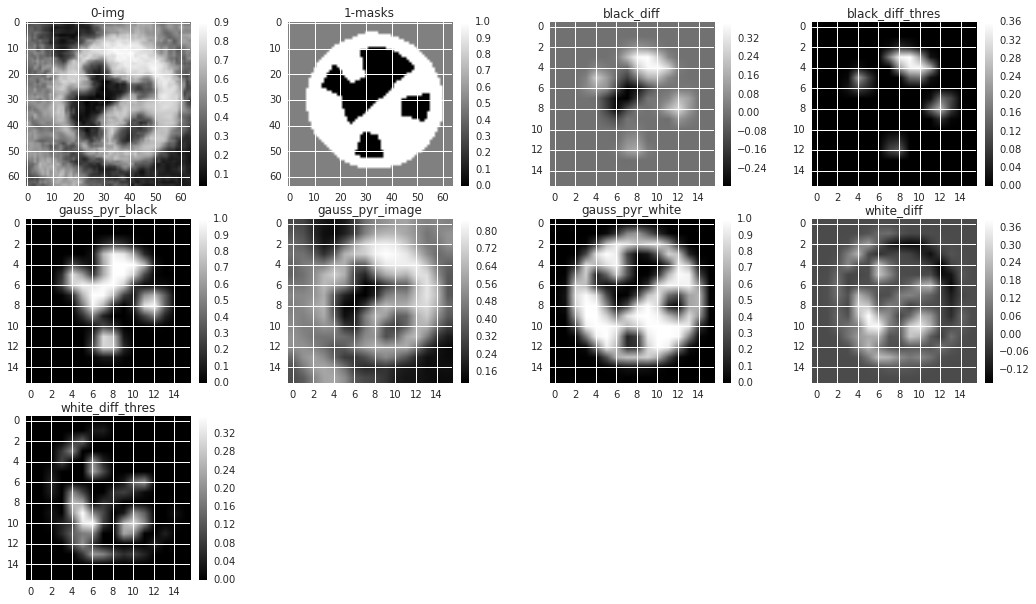

1
0 black_mean: [[[ 0.48012617]]]
1 mean_half_dist: [[[ 0.10000001]]]
2 white_mean: [[[ 0.68012619]]]
3 loss_black: 0.1297460939665037
4 loss_white: 0.11808918307687931
5 loss: 0.24783527704338298


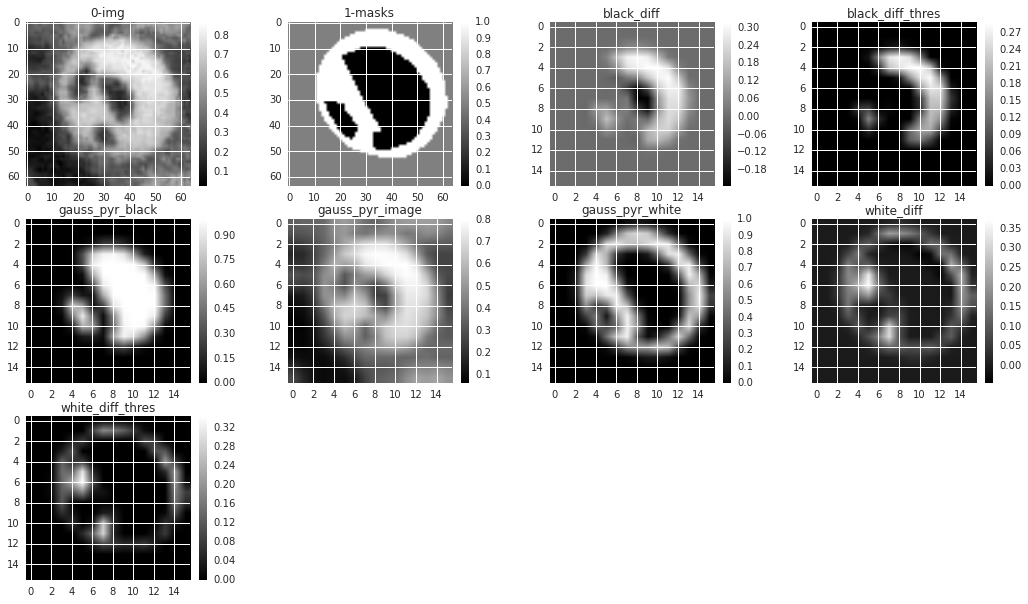

2
0 black_mean: [[[ 0.44943652]]]
1 mean_half_dist: [[[ 0.10000001]]]
2 white_mean: [[[ 0.64943653]]]
3 loss_black: 0.14873526065429493
4 loss_white: 0.13153879624391013
5 loss: 0.28027405689820506


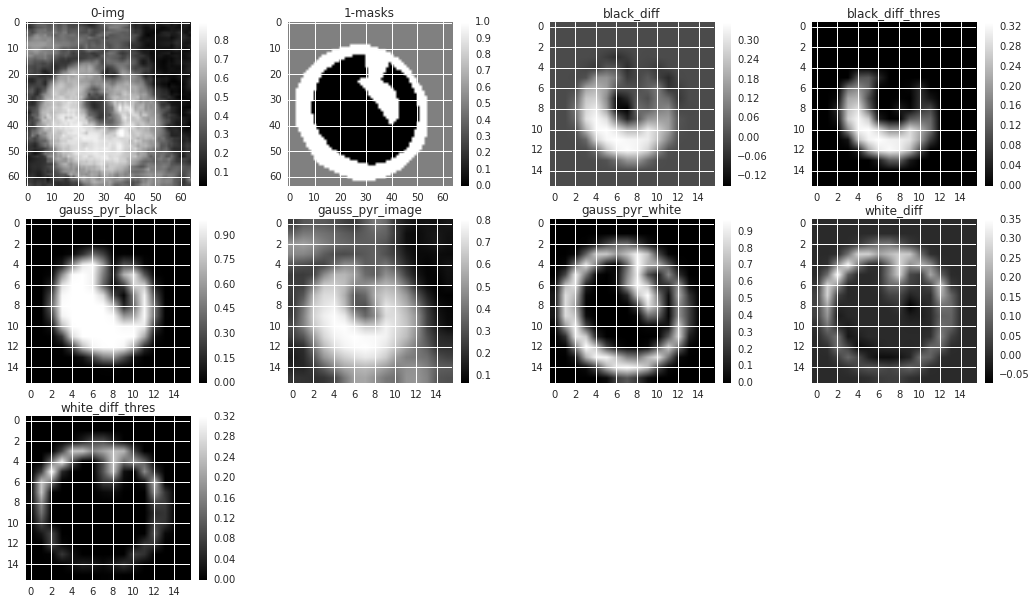

3
0 black_mean: [[[ 0.36706921]]]
1 mean_half_dist: [[[ 0.10000001]]]
2 white_mean: [[[ 0.56706923]]]
3 loss_black: 0.10153773159179971
4 loss_white: 0.1009238543445432
5 loss: 0.20246158593634292


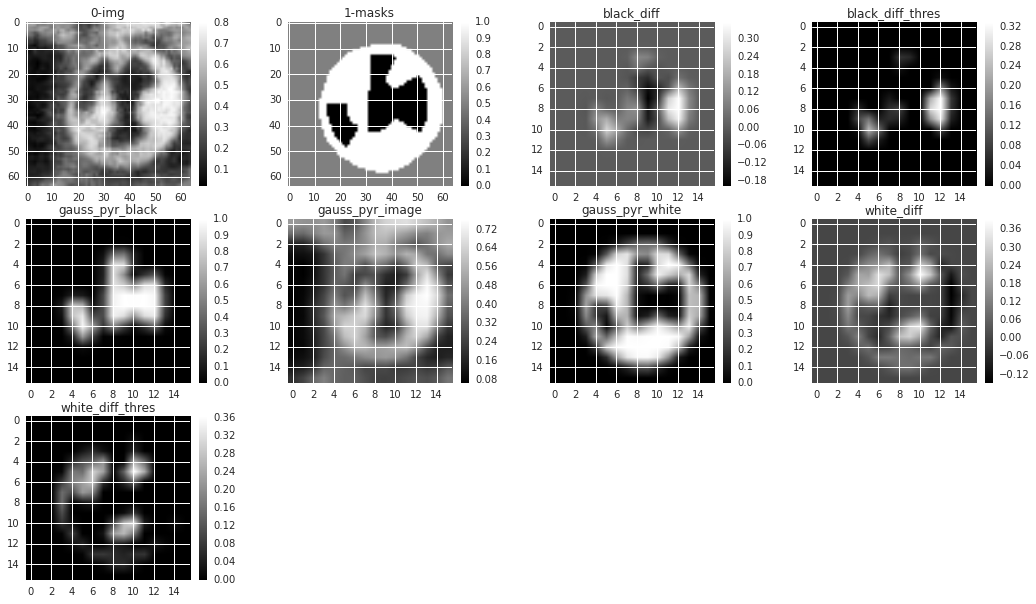

4
0 black_mean: [[[ 0.33193085]]]
1 mean_half_dist: [[[ 0.10000001]]]
2 white_mean: [[[ 0.53193086]]]
3 loss_black: 0.1498971299452949
4 loss_white: 0.1422618306618774
5 loss: 0.2921589606071723


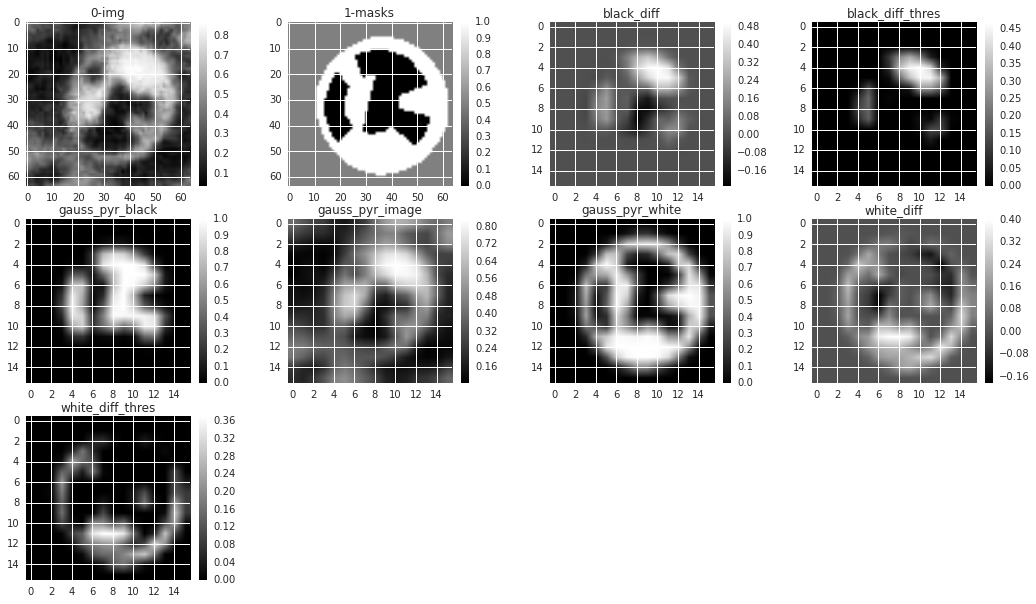

5
0 black_mean: [[[ 0.30964515]]]
1 mean_half_dist: [[[ 0.10000001]]]
2 white_mean: [[[ 0.50964516]]]
3 loss_black: 0.10301187245095984
4 loss_white: 0.10444777975398147
5 loss: 0.2074596522049413


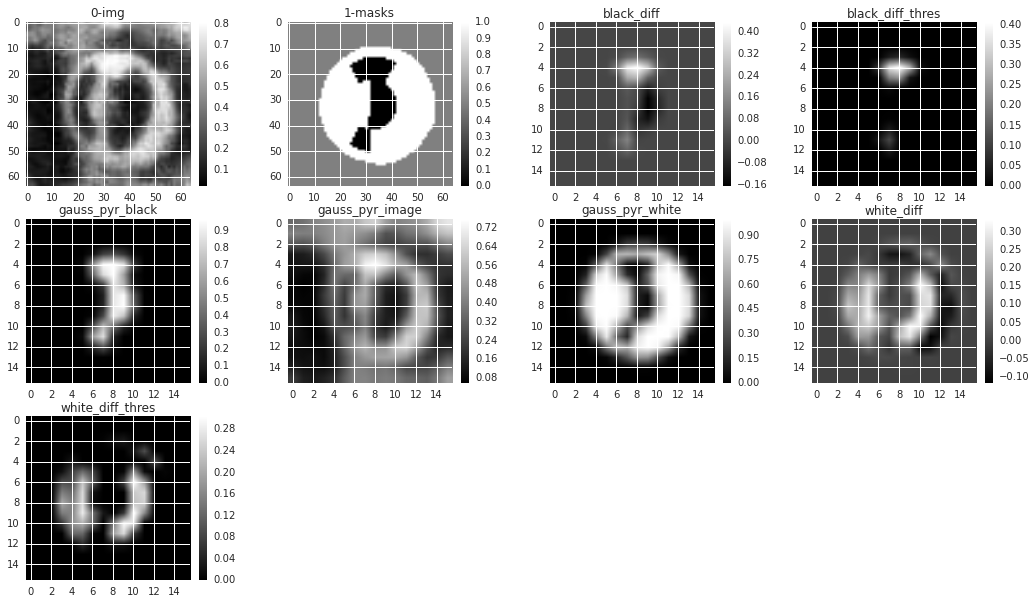

0.24415927414919542

In [8]:
evaluate_loss(gt_hist_eq, "pyramid_loss", pyramid_loss_fn, loss_dict, bit_flips=12, visualise=6)

Evaluating pyramid_loss with args () and kwargs {}:
0
0 black_mean: [[[ 0.39787596]]]
1 mean_half_dist: [[[ 0.09999999]]]
2 white_mean: [[[ 0.59787595]]]
3 loss_black: 0.0687738745680175
4 loss_white: 0.04657809791230566
5 loss: 0.11535197248032317


/home/leon/anaconda3/envs/np110/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


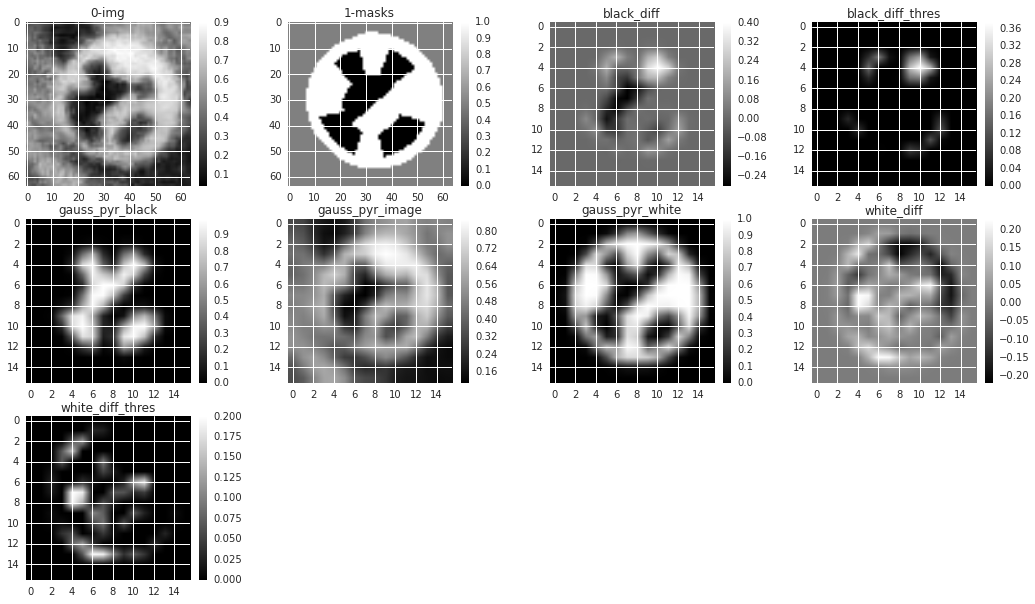

1
0 black_mean: [[[ 0.47022584]]]
1 mean_half_dist: [[[ 0.10000001]]]
2 white_mean: [[[ 0.67022586]]]
3 loss_black: 0.09574108990123373
4 loss_white: 0.07301982901695721
5 loss: 0.16876091891819095


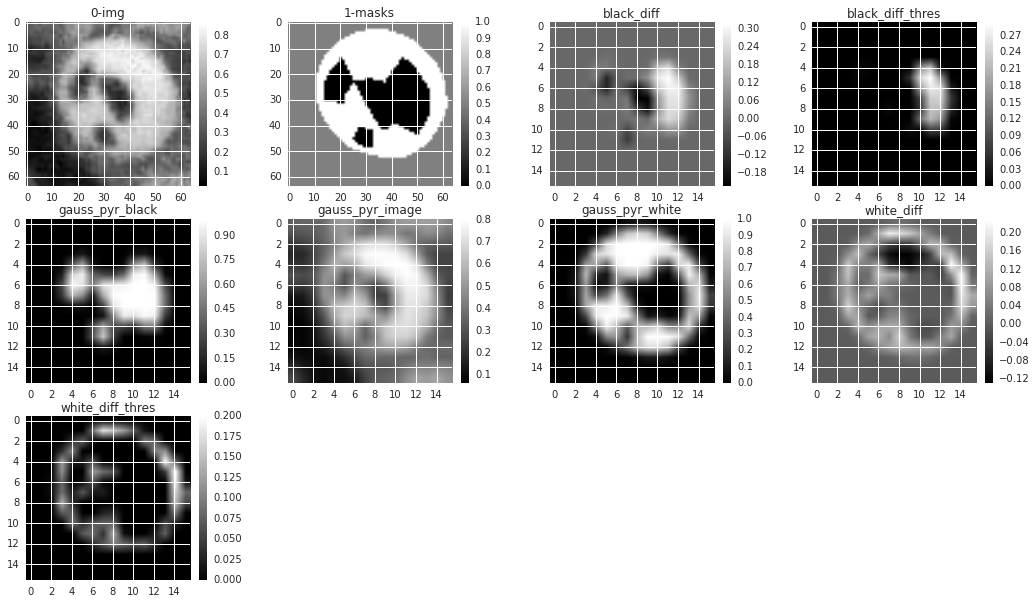

2
0 black_mean: [[[ 0.46615908]]]
1 mean_half_dist: [[[ 0.10000001]]]
2 white_mean: [[[ 0.66615909]]]
3 loss_black: 0.12175429130388898
4 loss_white: 0.11453669248417479
5 loss: 0.2362909837880638


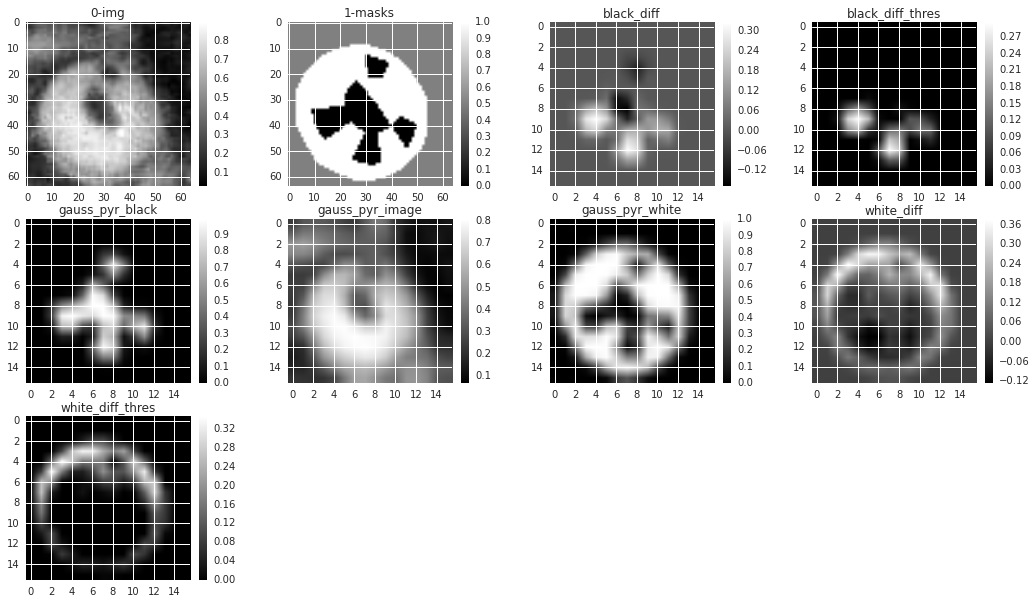

3
0 black_mean: [[[ 0.34592476]]]
1 mean_half_dist: [[[ 0.10000001]]]
2 white_mean: [[[ 0.54592478]]]
3 loss_black: 0.06232044902696536
4 loss_white: 0.06810914062814281
5 loss: 0.13042958965510817


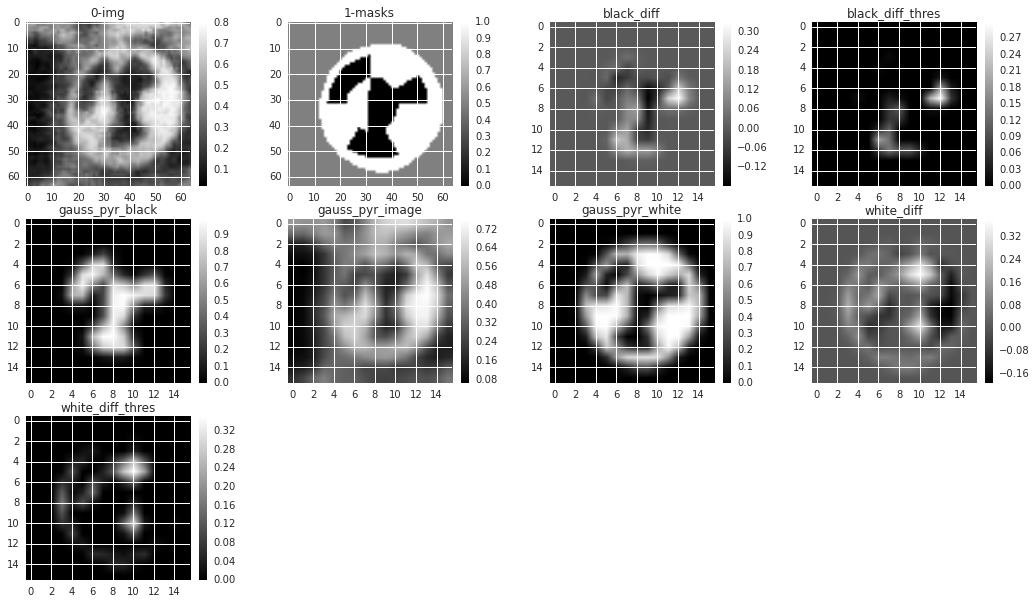

4
0 black_mean: [[[ 0.30933261]]]
1 mean_half_dist: [[[ 0.09999999]]]
2 white_mean: [[[ 0.5093326]]]
3 loss_black: 0.09503049639380999
4 loss_white: 0.0961985342118166
5 loss: 0.19122903060562657


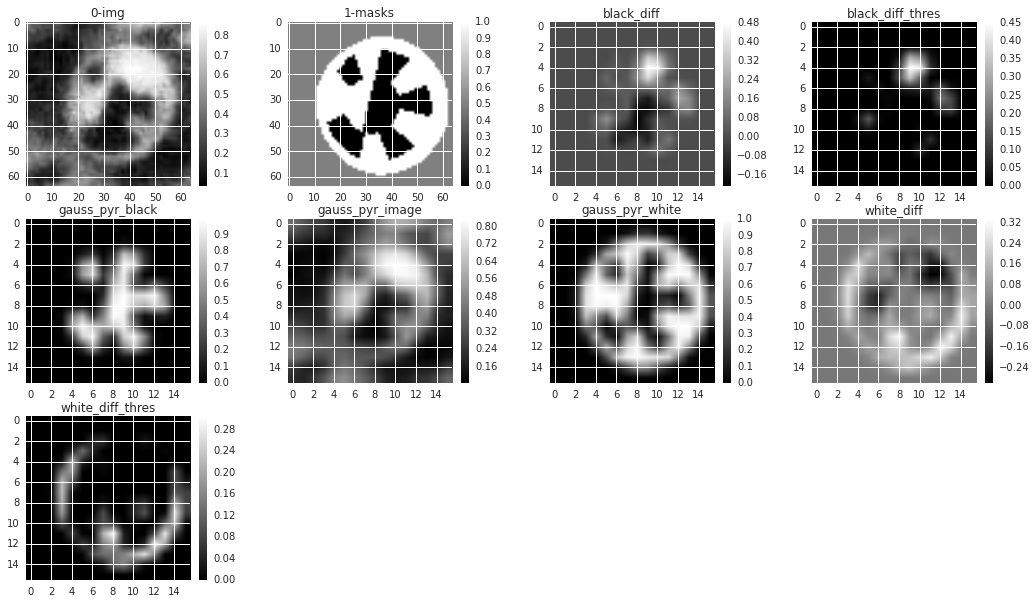

5
0 black_mean: [[[ 0.29092464]]]
1 mean_half_dist: [[[ 0.1017527]]]
2 white_mean: [[[ 0.49443004]]]
3 loss_black: 0.04050607753192689
4 loss_white: 0.04627558240386789
5 loss: 0.08678165993579479


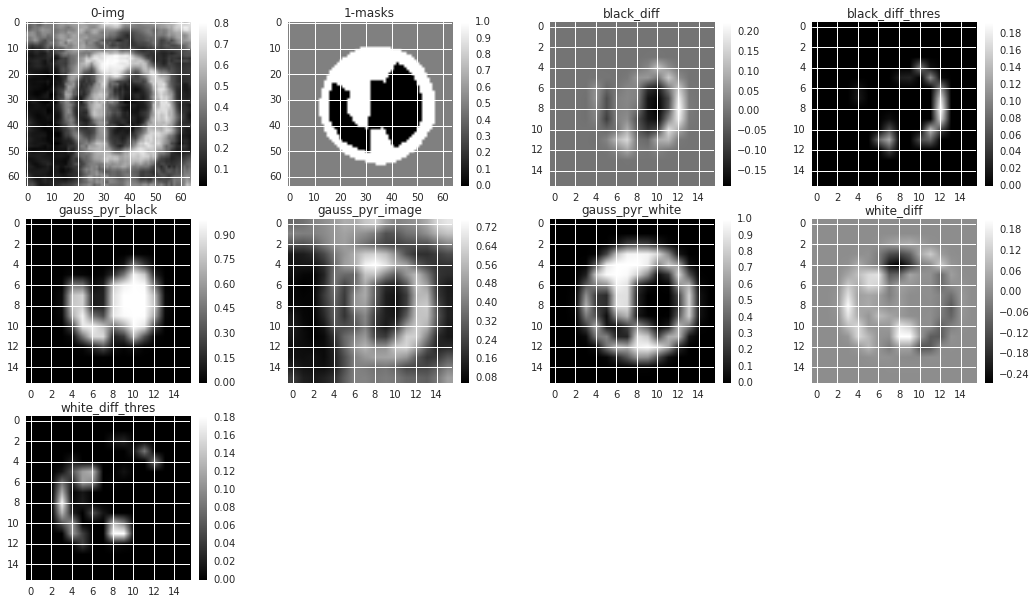

Total mean loss is: 0.1311397358243713


In [7]:
evaluate_loss(gt_hist_eq, "pyramid_loss", pyramid_loss_fn, loss_dict, bit_flips=3, visualise=6)

In [ ]:
evaluate_loss(gt_hist_eq, "mask_loss_sobel", mask_loss_sobel, visualise=6, diff_type='mse')

In [ ]:
evaluate_loss(gt_hist_eq, "mask_loss_sobel", mask_loss_sobel, visualise=6, diff_type='correlation')

In [ ]:
evaluate_loss(gt_hist_eq_thres, "mask_loss_sobel", mask_loss_sobel, visualise=6, diff_type='correlation')

In [ ]:
evaluate_loss(gt_hist_eq_thres, "mask_loss_mse", mask_loss_mse, visualise=6)

In [ ]:
evaluate_loss(gt_binary, "mask_loss_mse", mask_loss_mse, visualise=6)

In [ ]:
evaluate_loss(gt_hist_eq_thres, "mask_loss_adaptive_mse", mask_loss_adaptive_mse, visualise=6)

In [ ]:
batch_size = 512
gt, ids, configs = next(gt_grids(gt_files, batch_size))
z = CONFIG_LABELS.index("z_rotation")
y = CONFIG_LABELS.index("y_rotation")
x = CONFIG_LABELS.index("x_rotation")

z_rot = configs[:, z]
print((z_rot.min(), z_rot.max()))
masks, = draw_grids(ids, configs, artist=BlackWhiteArtist())
masks = masks / 255.
plt.figure(figsize=(30, 30))
zip_visualise_tiles(gt, masks)

In [ ]:
x = np.arange(100).reshape(10, 10).T
print(np.unwrap(x, axis=0))